Example notebook showing how to use the Ensemble sampler (currently in development)

In [1]:
import os
import sys
import torch
from getdist import plots, MCSamples
import getdist
import numpy as np
import matplotlib.pyplot as plt
import emcee
import logging

In [2]:
path = os.path.realpath(os.path.join(os.getcwd(), '../..'))
sys.path.insert(0, path)

In [3]:
from nnest import EnsembleSampler
from nnest.likelihoods import *
from nnest.priors import *

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [5]:
# Likelihood
#like = Himmelblau(2)
#prior = UniformPrior(2, -5, 5)
like = Rosenbrock(5)
prior = UniformPrior(5, -2, 10)
#like = Gaussian(2, 0.9)
#prior = UniformPrior(2, -5, 5)
#like = Eggbox(2)
#prior = UniformPrior(2, -15, 15)
#like = GaussianShell(2)
#prior = UniformPrior(2, -3, 3)
#like = GaussianMix(2)
#prior = UniformPrior(2, -8, 8)
#like = DoubleGaussianShell(2, centers=[[-4.0, 0.0], [4.0, 0.0]], weights=[0.5, 1.0])
#prior = UniformPrior(2, [-7, -3], [7, 3])

In [6]:
sampler = EnsembleSampler(like.x_dim, like, flow='spline', prior=prior)

Creating directory for new run logs/test/run93
[nnest.trainer] [INFO] SingleSpeedSpline(
  (flow): NormalizingFlow(
    (flows): ModuleList(
      (0): ActNorm()
      (1): Invertible1x1Conv()
      (2): NSF_CL(
        (f1): MLP(
          (net): Sequential(
            (0): Linear(in_features=3, out_features=16, bias=True)
            (1): LeakyReLU(negative_slope=0.2)
            (2): Linear(in_features=16, out_features=16, bias=True)
            (3): LeakyReLU(negative_slope=0.2)
            (4): Linear(in_features=16, out_features=16, bias=True)
            (5): LeakyReLU(negative_slope=0.2)
            (6): Linear(in_features=16, out_features=46, bias=True)
          )
        )
        (f2): MLP(
          (net): Sequential(
            (0): Linear(in_features=2, out_features=16, bias=True)
            (1): LeakyReLU(negative_slope=0.2)
            (2): Linear(in_features=16, out_features=16, bias=True)
            (3): LeakyReLU(negative_slope=0.2)
            (4): Linear(in_fe

In [7]:
sampler.run(1000, 100, bootstrap_iters=0, bootstrap_burn_in=100)

[nnest.sampler] [INFO] Initial acceptance [0.2236]
[nnest.sampler] [INFO] Acceptance [0.2227] min ESS [6.6678] max ESS [19.9215] average jump [0.4852]
[nnest.trainer] [INFO] Number of training samples [100]
[nnest.trainer] [INFO] Training jitter [0.0100]
[nnest.trainer] [INFO] Epoch [1] train loss [0.0657] validation loss [0.4964]
[nnest.trainer] [INFO] Epoch [100] train loss [-0.0075] validation loss [0.0474]
[nnest.trainer] [INFO] Epoch [200] train loss [-0.0190] validation loss [0.0573]
[nnest.trainer] [INFO] Epoch [237] ran out of patience
[nnest.trainer] [INFO] Best epoch [187] validation loss [0.0298] train time (s) [7.2403]]
[nnest.sampler] [INFO] Step [10] acceptance [0.4311] min ESS [1.1051] max ESS [1.2752] average jump [0.3035]
[nnest.sampler] [INFO] Step [20] acceptance [0.3995] min ESS [1.1584] max ESS [1.2973] average jump [0.2645]
[nnest.sampler] [INFO] Step [30] acceptance [0.3690] min ESS [1.1687] max ESS [1.3747] average jump [0.2372]
[nnest.sampler] [INFO] Step [40] 

[nnest.sampler] [INFO] Step [700] acceptance [0.2901] min ESS [2.6122] max ESS [4.1438] average jump [0.1750]
[nnest.sampler] [INFO] Step [710] acceptance [0.2900] min ESS [2.6183] max ESS [4.1887] average jump [0.1750]
[nnest.sampler] [INFO] Step [720] acceptance [0.2899] min ESS [2.6193] max ESS [4.2292] average jump [0.1747]
[nnest.sampler] [INFO] Step [730] acceptance [0.2894] min ESS [2.6103] max ESS [4.2636] average jump [0.1744]
[nnest.sampler] [INFO] Step [740] acceptance [0.2892] min ESS [2.6041] max ESS [4.2961] average jump [0.1744]
[nnest.sampler] [INFO] Step [750] acceptance [0.2889] min ESS [2.5974] max ESS [4.3346] average jump [0.1741]
[nnest.sampler] [INFO] Step [760] acceptance [0.2886] min ESS [2.5825] max ESS [4.3833] average jump [0.1740]
[nnest.sampler] [INFO] Step [770] acceptance [0.2882] min ESS [2.5740] max ESS [4.4293] average jump [0.1739]
[nnest.sampler] [INFO] Step [780] acceptance [0.2881] min ESS [2.5571] max ESS [4.4720] average jump [0.1742]
[nnest.sam

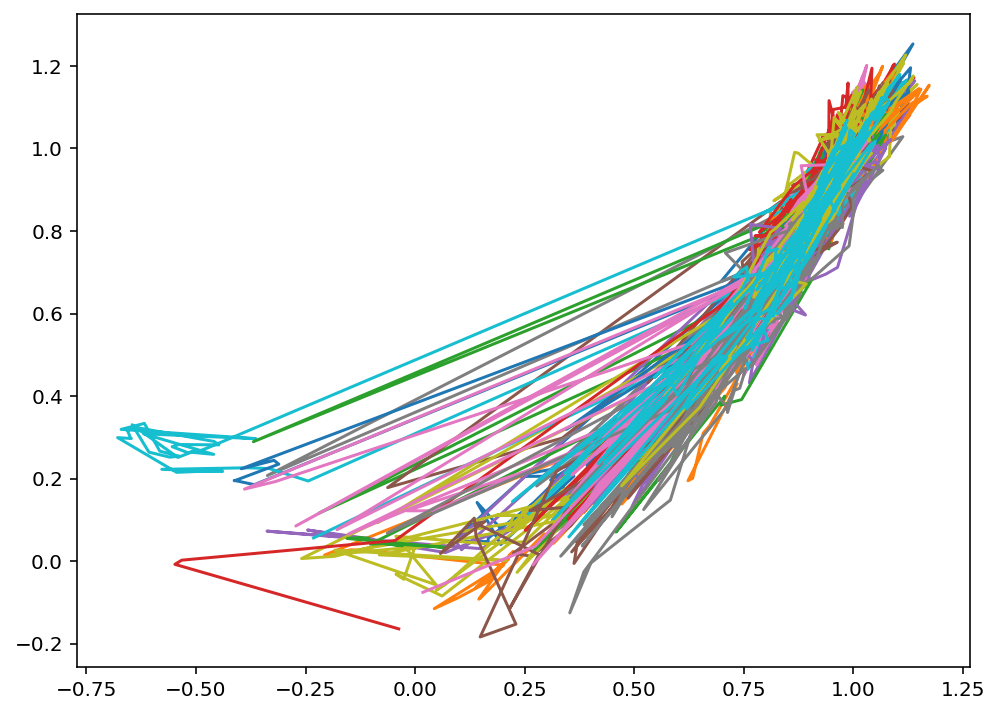

In [8]:
fig = plt.figure(figsize=(8,6))
for i in range(20):
    plt.plot(sampler.samples[i,:,0], sampler.samples[i,:,1])
plt.show()

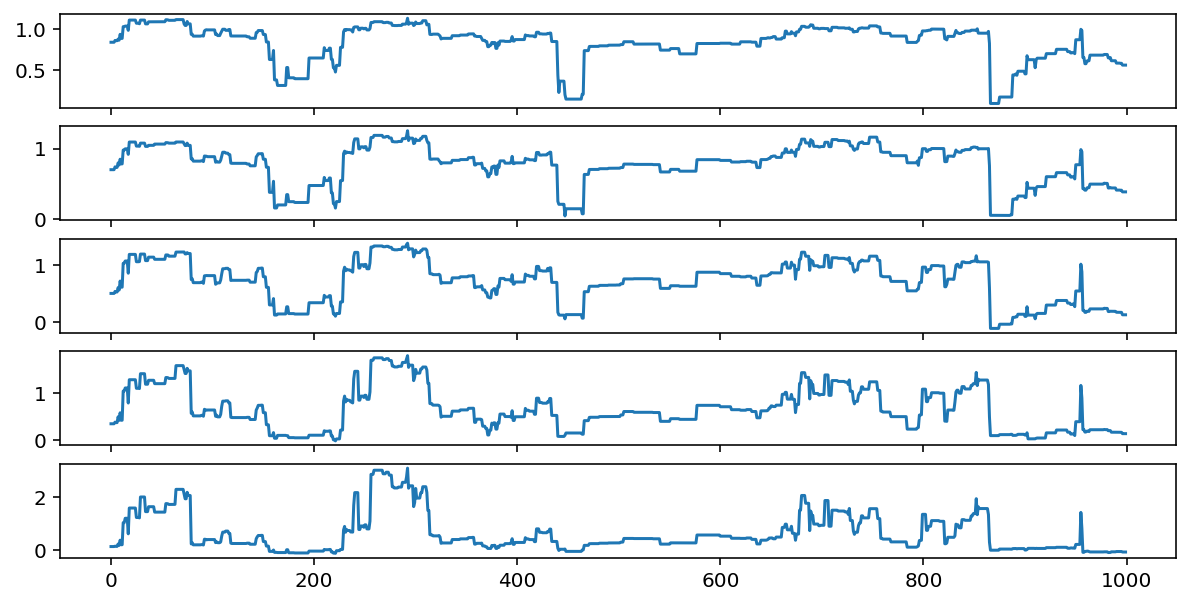

In [9]:
fig, ax = plt.subplots(like.x_dim, 1, figsize=(10, like.x_dim), sharex=True)
for i in range(like.x_dim):
    ax[i].plot(sampler.samples[0,:,i])
plt.show()

In [10]:
# Note it isn't correct to treat these as independent chains 
mc = MCSamples(samples=[sampler.samples[i, :, :].squeeze() for i in range(sampler.samples.shape[0])], 
               loglikes=[-sampler.loglikes[i, :].squeeze() for i in range(sampler.loglikes.shape[0])], 
               ignore_rows=0.3)

Removed 0.3 as burn in


In [11]:
print(mc.getEffectiveSamples())
print(mc.getMargeStats())

447.30143632213816
Marginalized limits: 0.68; 0.95; 0.99

parameter   mean           sddev          lower1         upper1         limit1 lower2         upper2         limit2 lower3         upper3         limit3 
param1      8.3586517E-01  2.6431794E-01  8.0171968E-01  1.0806157E+00  two    9.9973510E-02  1.1453947E+00  two   -2.8172937E-01  1.1706282E+00  two     p_{1}
param2      7.7190655E-01  3.0651885E-01  6.4662238E-01  1.1403219E+00  two    8.3106698E-02  1.2004068E+00  two   -5.5722851E-02  1.2396709E+00  two     p_{2}
param3      6.9091383E-01  3.8766743E-01  4.1140337E-01  1.2300659E+00  two   -1.6779247E-02  1.3104429E+00  two   -8.7755607E-02  1.3598790E+00  two     p_{3}
param4      6.3284671E-01  5.2410540E-01 -6.5443051E-02  9.1090989E-01  two   -1.1261756E-01  1.6541973E+00  two   -1.5857837E-01  1.8638316E+00  two     p_{4}
param5      6.8307691E-01  8.6774659E-01 -1.2152150E-01  7.6295341E-01  two   -1.6362069E-01  3.3242953E+00  two   -1.7172239E-01  3.4084165E+00  tw

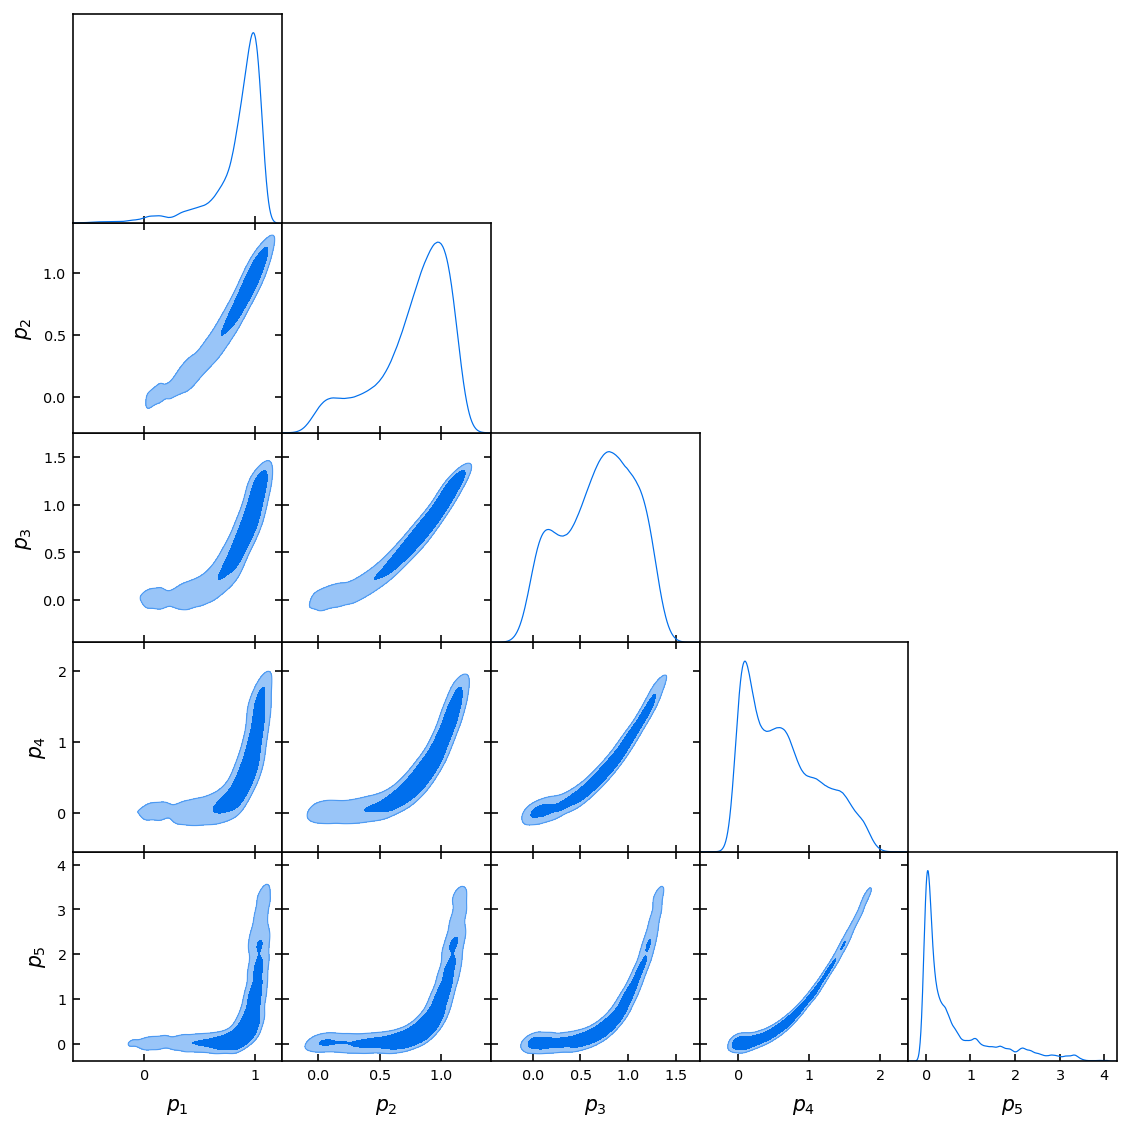

In [12]:
g = plots.getSubplotPlotter(width_inch=8)
g.triangle_plot(mc, filled=True)

In [13]:
N = np.exp(np.linspace(np.log(100), np.log(sampler.samples.shape[1]), 10)).astype(int)
autocorr = np.zeros((len(N), sampler.samples.shape[2]))
logging.disable(logging.CRITICAL)
for i, n in enumerate(N):
    autocorr[i, :] = emcee.autocorr.integrated_time(np.transpose(sampler.samples[:,:n,:], axes=[1, 0, 2]), quiet=True)

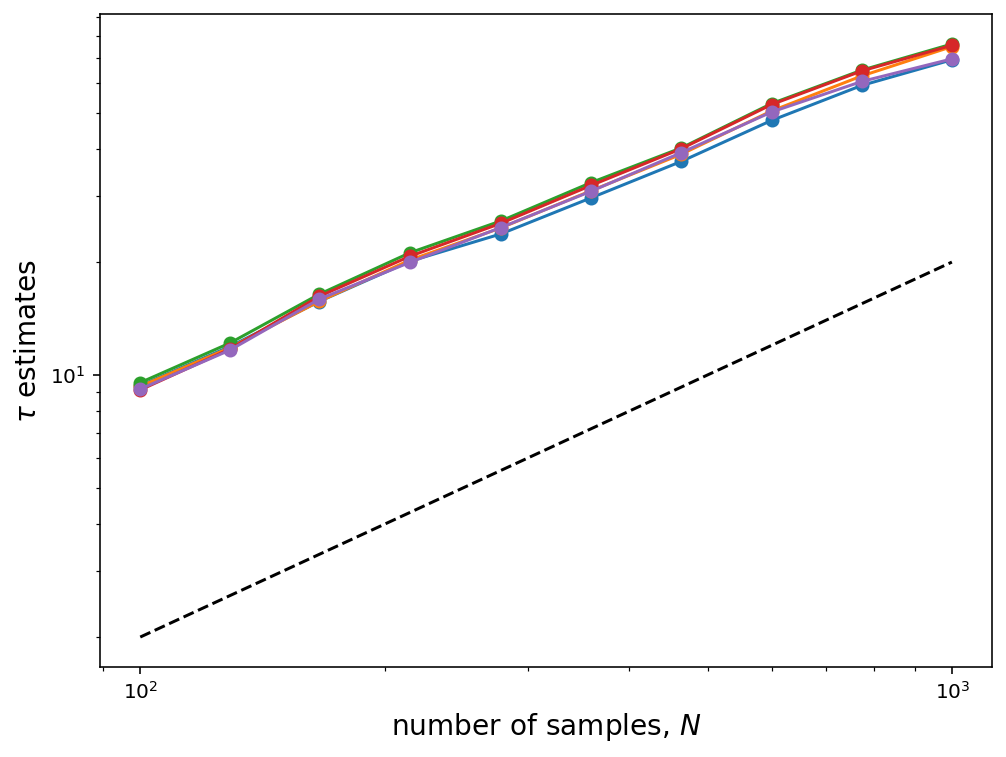

In [14]:
plt.figure(figsize=(8,6))
for i in range(autocorr.shape[1]):
    plt.loglog(N, autocorr[:, i], "o-")
plt.plot(N, N / 50.0, "--k", label=r"$\tau = N/50$")
plt.xlabel("number of samples, $N$", fontsize=14)
plt.ylabel(r"$\tau$ estimates", fontsize=14)
plt.show()